In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math
import fsps
import pandas as pd
import sympy

plt.rcParams['figure.dpi']= 100
plt.style.use('sm.mplstyle')
plt.style.use('dark_background')

In [2]:
%%time
sp = fsps.StellarPopulation(compute_vega_mags=False, zcontinuous=1,
                                sfh=0, logzsol=0.0, dust_type=2, dust2=0.2)

CPU times: user 27 s, sys: 922 ms, total: 27.9 s
Wall time: 27.6 s


In [3]:
%%time
sdss_bands = fsps.find_filter('sdss')
print(sdss_bands)

['sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 'sdss_z']
CPU times: user 118 µs, sys: 5 µs, total: 123 µs
Wall time: 126 µs


The first call to `get_mags()` will take a long time, as the module is calculating everything for everything! Once it has done that the results are stored in the object though.

In [4]:
%%time
result = sp.get_mags(bands=sdss_bands)

CPU times: user 2min 14s, sys: 701 ms, total: 2min 15s
Wall time: 2min 14s


Subsequent calls to `get_mags()` are very quick.

In [7]:
%%time
sp.get_mags(tage=3.0, redshift=1.0, bands=sdss_bands)

CPU times: user 24 ms, sys: 12 ms, total: 36 ms
Wall time: 35.5 ms


array([57.92702758, 54.55491742, 52.0338802 , 50.91737216, 49.84241311])

The `sp` object stores complete spectra!

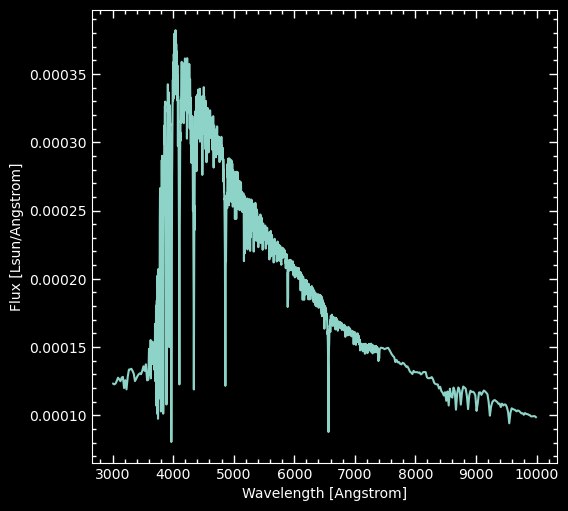

CPU times: user 594 ms, sys: 12 ms, total: 606 ms
Wall time: 604 ms


In [29]:
%%time

wave, spec = sp.get_spectrum(tage=0.5, peraa=True);

# Plot the spectrum in the range 3000A to 10,000A
idx_low = np.searchsorted(wave, 3000, side="left");
idx_high = np.searchsorted(wave, 10000, side="left");
xdata = wave[idx_low:idx_high]
ydata = spec[idx_low:idx_high]

plt.plot(xdata,ydata);
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Flux [Lsun/Angstrom]")
plt.show()